# Web Science Geolocalisation Assessment(M)

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from math import *
from matplotlib.colors import LogNorm
import seaborn as sns

## Question 1

#### Reading the geoLondonJan tweet file

In [3]:
tweets_df=pd.read_json('data/geoLondonJan', lines=True)
tweets_df

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source
0,1486425030581968898,{'$date': '2022-01-26T19:45:18Z'},RichartinFan,"Just posted a photo @ London, Unιted Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.07939436,...",Devil's Island~,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram
1,1486425474335076352,{'$date': '2022-01-26T19:47:04Z'},CelebFitnessTV,How to Make Sure Your COVID Test Isn't Fake ht...,True,"{'type': 'Point', 'coordinates': [-0.18016398,...",United Kingdom,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],dlvr.it
2,1486427410434301952,{'$date': '2022-01-26T19:54:45Z'},DJAgroUK,Throwback to when Me and @toogreezey met @mc_j...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",south uk,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[legends, southampton, uk]","[toogreezey, ONAMISSIONHQ]",Instagram
3,1486427833899655169,{'$date': '2022-01-26T19:56:26Z'},komabs16,GY413\n#andresrodriguezpose @ The London Schoo...,True,"{'type': 'Point', 'coordinates': [-0.116778920...","London, England","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[andresrodriguezpose],[],Instagram
4,1486429309019566086,{'$date': '2022-01-26T20:02:18Z'},Flip_Calvi,even when you should have learned bitterness i...,True,"{'type': 'Point', 'coordinates': [-0.216667, 5...","London, England","Merton, London",United Kingdom,GB,"[[[-0.25426899999999997, 51.379947], [-0.12430...",[],[],Instagram
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,1488781350845005827,{'$date': '2022-02-02T07:48:28Z'},wildeoneslondon,Just posted a photo @ Wilde Ones Shop https://...,True,"{'type': 'Point', 'coordinates': [-0.1735458, ...",London,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],Instagram
4138,1488781369887105028,{'$date': '2022-02-02T07:48:33Z'},foodship_evelyn,"Just posted a photo @ London, United Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram
4139,1488781997824638976,{'$date': '2022-02-02T07:51:03Z'},BritishHeraldUK,#Landslideskill at least 18 in #Ecuadorcapital...,True,"{'type': 'Point', 'coordinates': [-0.12485951,...","London, United Kingdom","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...","[Landslideskill, Ecuadorcapital]",[],dlvr.it
4140,1488782659899830272,{'$date': '2022-02-02T07:53:41Z'},shadrac_matata,@luda_eliud @iLabAfrica My pleasure! Check DM.,True,"{'type': 'Point', 'coordinates': [-0.144060000...","Kitui, Eldoret, London","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],"[luda_eliud, iLabAfrica]",Twitter for Shadrack Matata


#### Calculating the Distance using Haversine formula

In [3]:
def distance_points(pointA, pointB):
    LongA = pointA[0]
    LatA = pointA[1]
    LongB = pointB[0]
    LatB = pointB[1]

    delta_lat = (LatA-LatB) * (math.pi/180)
    delta_long = (LongA-LongB) * (math.pi/180)
    radius = 6371

    #haversine formula calculation
    a = sin(delta_lat/2)**2 + (cos((LatA * (math.pi/180)))*cos((LatB * (math.pi/180)))*sin(delta_long/2)**2)
    c = 2*atan2(sqrt(a),sqrt(1-a))
    d = radius*c

    return d

#### Creation of grid

In [4]:
# four corners of the grid
bottomLeft = (-0.563, 51.261318)
bottomRight = (0.28036, 51.261318)
topLeft = (-0.563, 51.686031)
topRight = (0.28036, 51.686031)

delta_lat = topLeft[1]-bottomLeft[1]
delta_long = bottomLeft[0] - bottomRight[0]

#rows - lat, cols-long
#calculating number of rows and columns
num_rows = int(np.ceil(distance_points(bottomLeft,topLeft)))
num_cols = int(np.ceil(distance_points(bottomLeft,bottomRight)))

print(num_rows,',',num_cols)

#linspace - evenly spaced numbers between lat and long
cols = np.linspace(bottomLeft[0], bottomRight[0], num=num_cols)
rows = np.linspace(bottomLeft[1], topLeft[1], num=num_rows)

print(cols)
print(rows)


48 , 59
[-0.563      -0.54845931 -0.53391862 -0.51937793 -0.50483724 -0.49029655
 -0.47575586 -0.46121517 -0.44667448 -0.43213379 -0.4175931  -0.40305241
 -0.38851172 -0.37397103 -0.35943034 -0.34488966 -0.33034897 -0.31580828
 -0.30126759 -0.2867269  -0.27218621 -0.25764552 -0.24310483 -0.22856414
 -0.21402345 -0.19948276 -0.18494207 -0.17040138 -0.15586069 -0.14132
 -0.12677931 -0.11223862 -0.09769793 -0.08315724 -0.06861655 -0.05407586
 -0.03953517 -0.02499448 -0.01045379  0.0040869   0.01862759  0.03316828
  0.04770897  0.06224966  0.07679034  0.09133103  0.10587172  0.12041241
  0.1349531   0.14949379  0.16403448  0.17857517  0.19311586  0.20765655
  0.22219724  0.23673793  0.25127862  0.26581931  0.28036   ]
[51.261318   51.27035445 51.27939089 51.28842734 51.29746379 51.30650023
 51.31553668 51.32457313 51.33360957 51.34264602 51.35168247 51.36071891
 51.36975536 51.37879181 51.38782826 51.3968647  51.40590115 51.4149376
 51.42397404 51.43301049 51.44204694 51.45108338 51.460119

#### Initialising an empty grid to store the tweets counts

In [5]:
tweet_grid = np.zeros((len(rows),len(cols)))
tweet_grid.shape

(48, 59)

#### Allocate tweets to grid

In [6]:
#x - latitude
#y - longitude

#Gathering the coordinates of tweets in separate lists for easy processing
x_tweets=[]
y_tweets=[]

for tweet in tweets_df['coordinates']:
    x_tweets.append(tweet['coordinates'][1])
    y_tweets.append(tweet['coordinates'][0])


#### Intepretation of the tweets in the grid

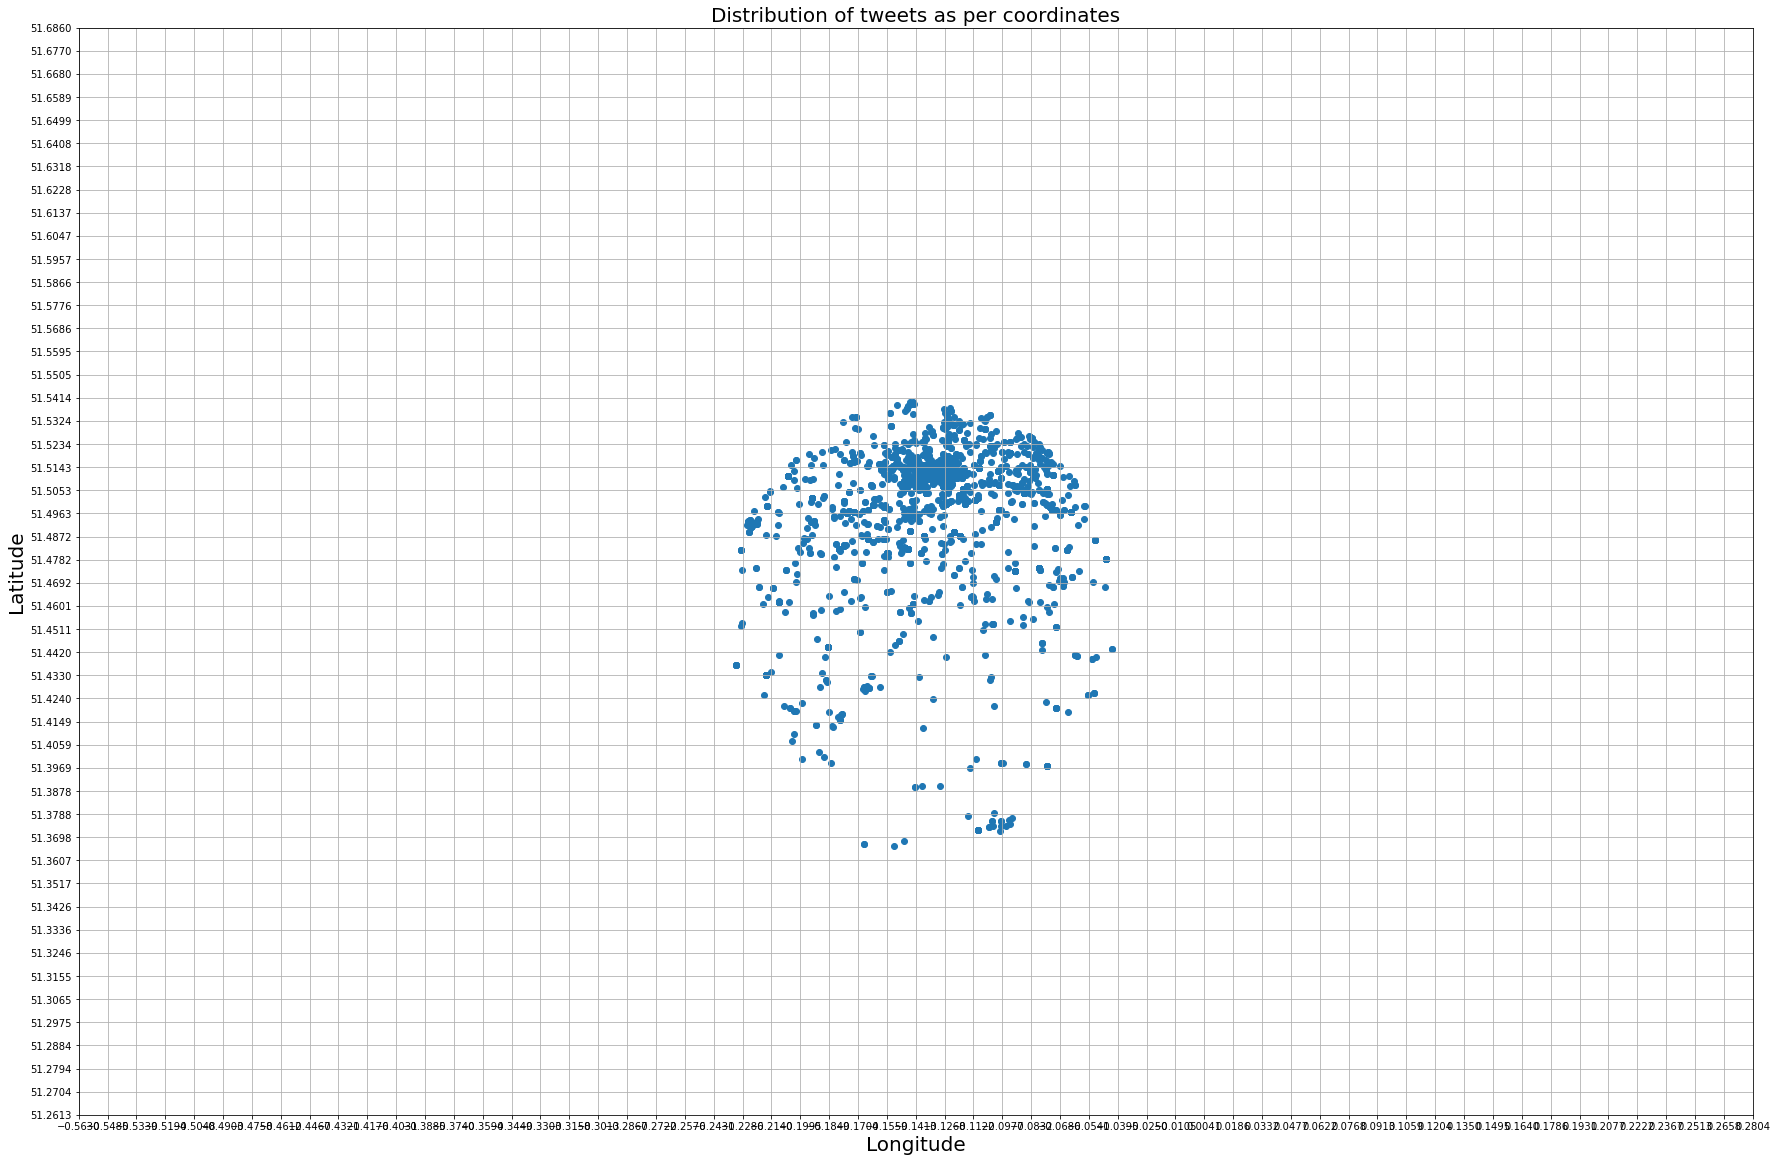

In [7]:
#Scatter plot to show the coordinates of the tweets inside grid

plt.figure(figsize=(30,20))
plt.grid()
plt.scatter(y_tweets,x_tweets)
plt.xticks(cols)
plt.yticks(rows)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.title('Distribution of tweets as per coordinates',fontsize=20)
plt.show()

#### Allocating the tweets inside the empty grid created

In [8]:
#looping through the range of tweets to calculate the number of tweets inside a grid and storing them at the grid index
#the empty grid created previously now holds the number of tweets within the grid boundary

for i in range(len(tweets_df['coordinates'])):
    row_val = int(np.ceil(distance_points(bottomLeft,[bottomLeft[0],x_tweets[i]])))
    col_val = int(np.ceil(distance_points(bottomLeft,[y_tweets[i],bottomLeft[1]])))
    tweet_grid[row_val,col_val]+=1

In [9]:
#Maximum number of tweet inside a grid
print('Maximum number of tweets at a grid: ',np.amax(tweet_grid))
print('Index of grid with maximum number of tweets: ',np.where(tweet_grid==np.amax(tweet_grid)))

Maximum number of tweets at a grid:  1338.0
Index of grid with maximum number of tweets:  (array([29], dtype=int64), array([32], dtype=int64))


#### Heatmap representation of the number of tweets inside each grid

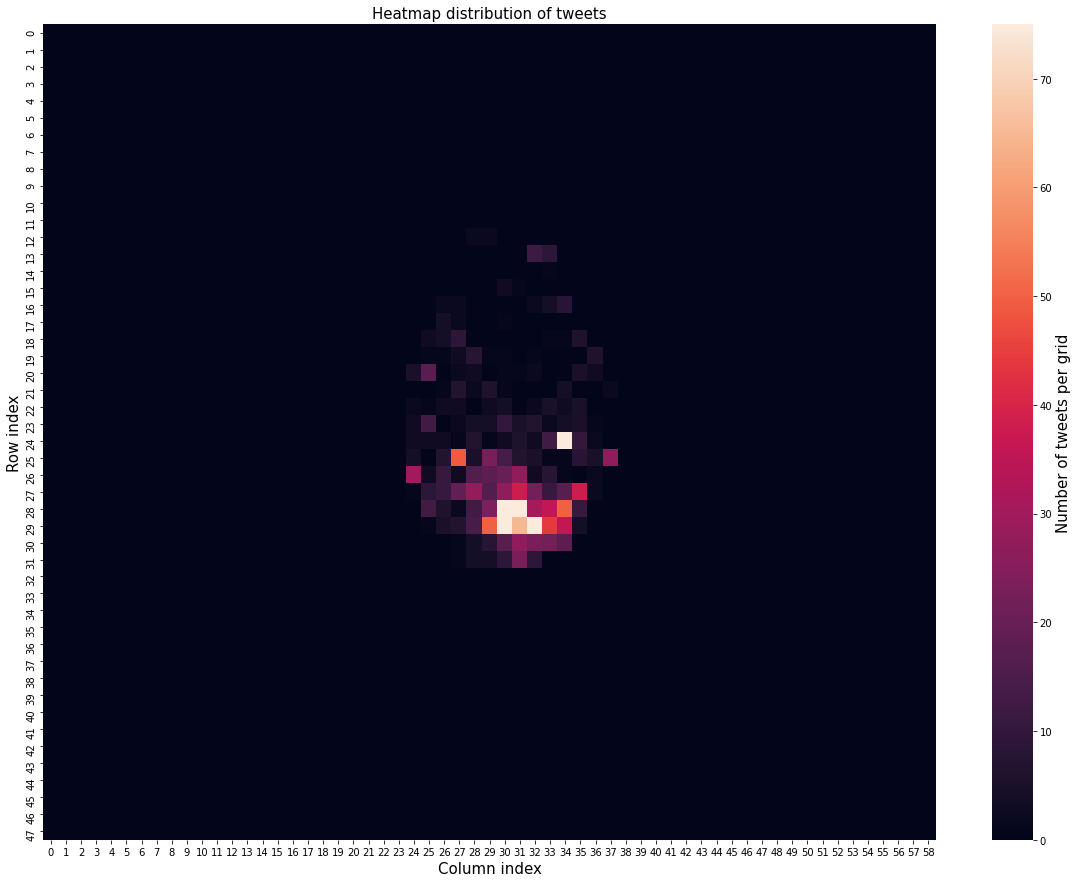

In [10]:
plt.figure(figsize = (20,15))
cbar_kws={'label': 'Number of tweets per grid'}
tweet_heatmap = sns.heatmap(tweet_grid,vmin=0,vmax=75,cbar_kws=cbar_kws,xticklabels=np.arange(len(cols)),yticklabels=np.arange(len(rows)))
tweet_heatmap.set_xlabel('Column index', fontsize=15)
tweet_heatmap.set_ylabel('Row index', fontsize=15)
tweet_heatmap.set_title("Heatmap distribution of tweets",fontsize=15)
tweet_heatmap.figure.axes[-1].yaxis.label.set_size(15)

#### Interpretation of number of tweets vs number of grids

In [11]:
# Getting the number of tweets and number of grid counts via dictionary format
# return_counts=True returns the number of times each unique item appeared in the tweet_grid
# Key value of dictionary holds the tweet count 
#Value in dictionary holds the number of grids counts
num_tweets, grid_counts = np.unique(tweet_grid, return_counts=True)
tweet_count_dict=dict(zip(num_tweets, grid_counts))
tweet_count_dict

{0.0: 2678,
 1.0: 25,
 2.0: 18,
 3.0: 18,
 4.0: 13,
 5.0: 10,
 6.0: 5,
 7.0: 6,
 8.0: 5,
 9.0: 5,
 10.0: 2,
 11.0: 4,
 12.0: 1,
 13.0: 4,
 14.0: 2,
 16.0: 2,
 17.0: 3,
 18.0: 2,
 19.0: 1,
 20.0: 1,
 22.0: 2,
 23.0: 3,
 24.0: 1,
 27.0: 4,
 28.0: 1,
 30.0: 1,
 31.0: 1,
 36.0: 2,
 38.0: 2,
 44.0: 1,
 49.0: 1,
 50.0: 2,
 65.0: 1,
 85.0: 1,
 141.0: 1,
 565.0: 1,
 585.0: 1,
 1338.0: 1}

#### Plotting the above findings in bar graph format

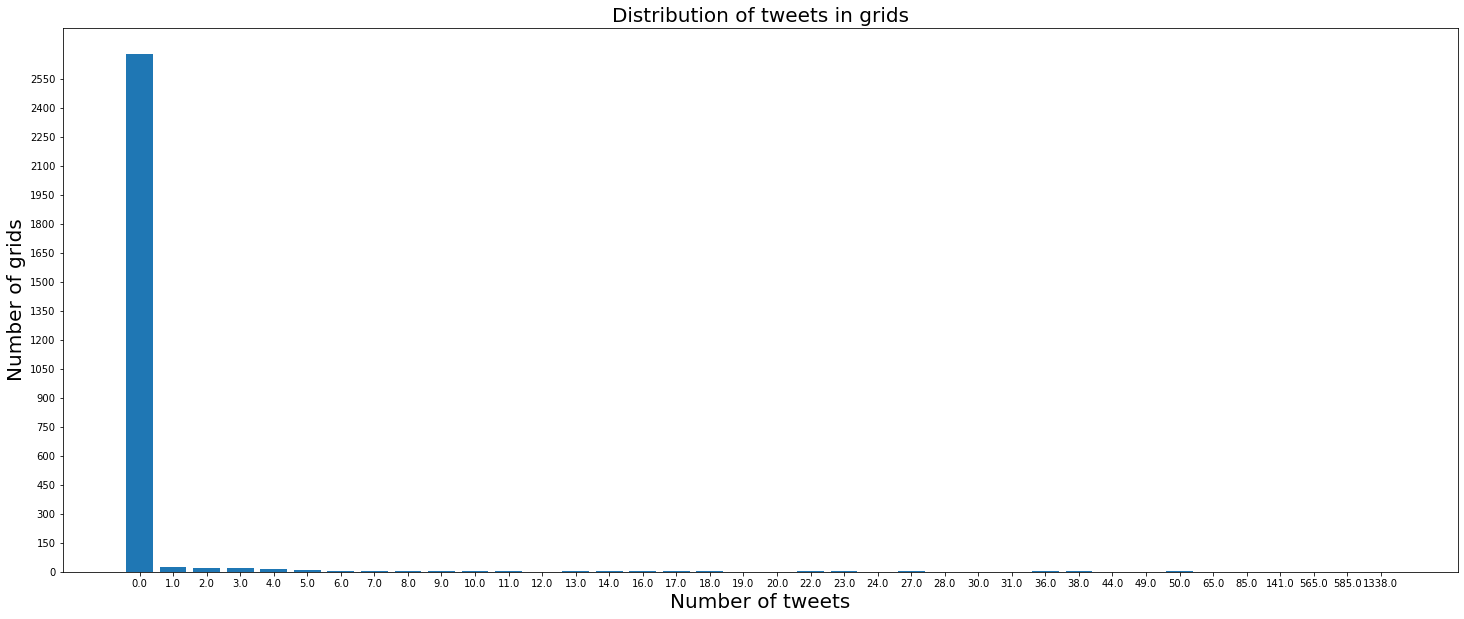

In [12]:
x_axis = tweet_count_dict.keys()
y_axis = tweet_count_dict.values()
plt.figure(figsize = (25,10))
plt.bar(range(len(tweet_count_dict)),y_axis)
plt.xticks(range(len(tweet_count_dict)), list(x_axis))
plt.yticks(np.arange(0,max(y_axis),150))
plt.title('Distribution of tweets in grids',fontsize=20)
plt.xlabel("Number of tweets",fontsize=20)
plt.ylabel("Number of grids",fontsize=20)
plt.show()

## Question 2

#### Importing the high quality files and low quality files

In [4]:
high_quality=pd.read_json('data/highFileFeb', lines=True)
low_quality=pd.read_json('data/lowFileFeb', lines=True)

#### Importing spacy and nltk to tokenise the high quality and low quality texts

In [14]:
#!pip install -U spacy
import spacy
#!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm', disable=['ner'])
nlp.remove_pipe('tagger')
nlp.remove_pipe('parser')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\R.Ramakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### Tokeniser function that tokenises the text being passed

In [15]:
def tokenize_text(text):
    tokens = []
    doc = nlp(text)
    for t in doc:
        # checking for stop words, punctuations, space and special charecters
        if not t.is_stop and not t.is_punct and not t.is_space and t.is_alpha:
            tokens.append(t.lemma_.lower())
    return tokens

#### Tokenising the received High quality and low quality 'text' fields

In [17]:
high_tokens_list=[]
high_tokens=[]
for text in high_quality['text']:
    if text!=None:
        token = tokenize_text(text)
        high_tokens_list.append(token)
for l in high_tokens_list:
    for i in l:
        high_tokens.append(i)

In [18]:
low_tokens_list=[]
low_tokens=[]
for text in low_quality['text']:
    if text!=None:
        token = tokenize_text(text)
        low_tokens_list.append(token)

for l in low_tokens_list:
    for i in l:
        low_tokens.append(i)

#### Background Document

In [19]:
bg_doc =high_tokens+low_tokens

#### Term Frequencies

In [20]:
from collections import Counter

In [21]:
term_freq_HQ = Counter(high_tokens)
term_freq_LQ = Counter(low_tokens)
term_freq_BG = Counter(bg_doc)

#### Raw Frequency

In [22]:
raw_high_quality = len(high_tokens)
raw_low_quality = len(low_tokens)
raw_bg = len(bg_doc)

#### Scoring Model

In [23]:
def scoring_calculate(threshold):
    rhq={}
    rlq={}
    shq={}
    slq={}
    for term in bg_doc:
        
        #Calculating the RHQ for the term
        if term_freq_HQ[term]!= 0 and term_freq_BG[term]!= 0:
            rhq[term]= (term_freq_HQ[term] / raw_high_quality) / (term_freq_BG[term] / raw_bg)
        else:
            rhq[term]=0
        
        #Calculating the RLQ for the term
        if term_freq_LQ[term]!= 0 and term_freq_BG[term]!= 0:
            rlq[term]= (term_freq_LQ[term] / raw_low_quality) / (term_freq_BG[term] / raw_bg)
        else:
            rlq[term]=0
        
        #Calculating the SHQ for term
        if rhq[term]>=threshold:
            shq[term]=rhq.get(term)
        else:
            shq[term]=0
        
        #Calculating the SLQ for term
        if rlq[term]>=threshold:
            slq[term]=rlq.get(term)
        else:
            slq[term]=0
        
    return shq,slq    

#### Calling scoring model created above with specific threshold

In [24]:
shq,slq=scoring_calculate(1.0)

#### Creating a Data frame with the SHQ and SLQ scores for each term

In [25]:
#Creating DF with SHQ values for each term
hq_scoring_df = pd.DataFrame.from_dict(shq,orient='index')
hq_scoring_df.columns=['SHQ']

#Creating DF with SLQ values for each term
lq_scoring_df = pd.DataFrame.from_dict(slq,orient='index')
lq_scoring_df.columns=['SLQ']

#Creating a combined DF from the SHQ and SLQ DF
df_list = [hq_scoring_df,lq_scoring_df]

scoring_df = pd.concat(df_list,axis=1)
scoring_df.index.name='Terms' #setting title for index
scoring_df

,SHQ,SLQ
Terms,,
new,1.079263,0.000000
york,0.000000,1.094022
times,0.000000,1.076376
bought,0.000000,1.435168
wordle,0.000000,1.291652
...,...,...
concentrate,0.000000,2.152753
confiscating,0.000000,2.152753
putins,0.000000,2.152753


## Question 3

#### Newsworthiness of tweets

#### Tokenising the text column of the geoLondonJan tweet dataframe

In [27]:
token_list=[]
for tweet in tweets_df['text']:
    tokens=tokenize_text(tweet)
    token_list.append(tokens)

#Adding a new column 'Tokens' to the dataframe to store the tokens being generated
tweets_df['Tokens']=token_list


In [28]:
tweets_df

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source,Tokens
0,1486425030581968898,{'$date': '2022-01-26T19:45:18Z'},RichartinFan,"Just posted a photo @ London, Unιted Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.07939436,...",Devil's Island~,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram,"[posted, photo, london, unιted, kingdom]"
1,1486425474335076352,{'$date': '2022-01-26T19:47:04Z'},CelebFitnessTV,How to Make Sure Your COVID Test Isn't Fake ht...,True,"{'type': 'Point', 'coordinates': [-0.18016398,...",United Kingdom,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],dlvr.it,"[sure, covid, test, fake]"
2,1486427410434301952,{'$date': '2022-01-26T19:54:45Z'},DJAgroUK,Throwback to when Me and @toogreezey met @mc_j...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",south uk,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[legends, southampton, uk]","[toogreezey, ONAMISSIONHQ]",Instagram,"[throwback, met, legends, southampton, uk, lon..."
3,1486427833899655169,{'$date': '2022-01-26T19:56:26Z'},komabs16,GY413\n#andresrodriguezpose @ The London Schoo...,True,"{'type': 'Point', 'coordinates': [-0.116778920...","London, England","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[andresrodriguezpose],[],Instagram,"[andresrodriguezpose, london, school, economic..."
4,1486429309019566086,{'$date': '2022-01-26T20:02:18Z'},Flip_Calvi,even when you should have learned bitterness i...,True,"{'type': 'Point', 'coordinates': [-0.216667, 5...","London, England","Merton, London",United Kingdom,GB,"[[[-0.25426899999999997, 51.379947], [-0.12430...",[],[],Instagram,"[learned, bitterness, called, tastes, like, sh..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,1488781350845005827,{'$date': '2022-02-02T07:48:28Z'},wildeoneslondon,Just posted a photo @ Wilde Ones Shop https://...,True,"{'type': 'Point', 'coordinates': [-0.1735458, ...",London,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],Instagram,"[posted, photo, wilde, ones, shop]"
4138,1488781369887105028,{'$date': '2022-02-02T07:48:33Z'},foodship_evelyn,"Just posted a photo @ London, United Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram,"[posted, photo, london, united, kingdom]"
4139,1488781997824638976,{'$date': '2022-02-02T07:51:03Z'},BritishHeraldUK,#Landslideskill at least 18 in #Ecuadorcapital...,True,"{'type': 'Point', 'coordinates': [-0.12485951,...","London, United Kingdom","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...","[Landslideskill, Ecuadorcapital]",[],dlvr.it,"[landslideskill, ecuadorcapital]"
4140,1488782659899830272,{'$date': '2022-02-02T07:53:41Z'},shadrac_matata,@luda_eliud @iLabAfrica My pleasure! Check DM.,True,"{'type': 'Point', 'coordinates': [-0.144060000...","Kitui, Eldoret, London","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],"[luda_eliud, iLabAfrica]",Twitter for Shadrack Matata,"[pleasure, check, dm]"


#### Newsworthiness calculation

In [29]:
newsworthiness_score={}
newsworthiness=[]
#Iterating through each tweet
for tweet in tweets_df['Tokens']:
    shq_value=0
    slq_value=0
    
    #calculating the shq and slq score for each term in the tokens
    for term in tweet:
        if term in scoring_df.index:
            shq_value+=scoring_df['SHQ'][term]
            slq_value+=scoring_df['SLQ'][term]
    
    #Newsworthiness calculation
    hq_sum = 1+shq_value
    lq_sum = 1+slq_value
    result=hq_sum/lq_sum
    newsworthy_value = math.log(result,2)
    
    #categorising the tweets as newsworthy or not
    if newsworthy_value>0.0:
        newsworthiness.append('Newsworthy')
    else:
        newsworthiness.append('Not-Newswothy')

# Creating a new column in the Dataframe to store whether the tweets are newsworthy or not
tweets_df['Newsworthy']=newsworthiness

In [30]:
tweets_df

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source,Tokens,Newsworthy
0,1486425030581968898,{'$date': '2022-01-26T19:45:18Z'},RichartinFan,"Just posted a photo @ London, Unιted Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.07939436,...",Devil's Island~,"Camberwell, London",United Kingdom,GB,"[[[-0.11147549999999999, 51.4194247], [-0.0297...",[],[],Instagram,"[posted, photo, london, unιted, kingdom]",Not-Newswothy
1,1486425474335076352,{'$date': '2022-01-26T19:47:04Z'},CelebFitnessTV,How to Make Sure Your COVID Test Isn't Fake ht...,True,"{'type': 'Point', 'coordinates': [-0.18016398,...",United Kingdom,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],dlvr.it,"[sure, covid, test, fake]",Newsworthy
2,1486427410434301952,{'$date': '2022-01-26T19:54:45Z'},DJAgroUK,Throwback to when Me and @toogreezey met @mc_j...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",south uk,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[legends, southampton, uk]","[toogreezey, ONAMISSIONHQ]",Instagram,"[throwback, met, legends, southampton, uk, lon...",Not-Newswothy
3,1486427833899655169,{'$date': '2022-01-26T19:56:26Z'},komabs16,GY413\n#andresrodriguezpose @ The London Schoo...,True,"{'type': 'Point', 'coordinates': [-0.116778920...","London, England","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[andresrodriguezpose],[],Instagram,"[andresrodriguezpose, london, school, economic...",Newsworthy
4,1486429309019566086,{'$date': '2022-01-26T20:02:18Z'},Flip_Calvi,even when you should have learned bitterness i...,True,"{'type': 'Point', 'coordinates': [-0.216667, 5...","London, England","Merton, London",United Kingdom,GB,"[[[-0.25426899999999997, 51.379947], [-0.12430...",[],[],Instagram,"[learned, bitterness, called, tastes, like, sh...",Not-Newswothy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4137,1488781350845005827,{'$date': '2022-02-02T07:48:28Z'},wildeoneslondon,Just posted a photo @ Wilde Ones Shop https://...,True,"{'type': 'Point', 'coordinates': [-0.1735458, ...",London,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],Instagram,"[posted, photo, wilde, ones, shop]",Not-Newswothy
4138,1488781369887105028,{'$date': '2022-02-02T07:48:33Z'},foodship_evelyn,"Just posted a photo @ London, United Kingdom h...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",London,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...",[],[],Instagram,"[posted, photo, london, united, kingdom]",Not-Newswothy
4139,1488781997824638976,{'$date': '2022-02-02T07:51:03Z'},BritishHeraldUK,#Landslideskill at least 18 in #Ecuadorcapital...,True,"{'type': 'Point', 'coordinates': [-0.12485951,...","London, United Kingdom","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...","[Landslideskill, Ecuadorcapital]",[],dlvr.it,"[landslideskill, ecuadorcapital]",Not-Newswothy
4140,1488782659899830272,{'$date': '2022-02-02T07:53:41Z'},shadrac_matata,@luda_eliud @iLabAfrica My pleasure! Check DM.,True,"{'type': 'Point', 'coordinates': [-0.144060000...","Kitui, Eldoret, London","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],"[luda_eliud, iLabAfrica]",Twitter for Shadrack Matata,"[pleasure, check, dm]",Not-Newswothy


#### Count of Newsworthy and non newsworthy tweets

Not-Newswothy    3148
Newsworthy        994
Name: Newsworthy, dtype: int64


<AxesSubplot:ylabel='Newsworthy'>

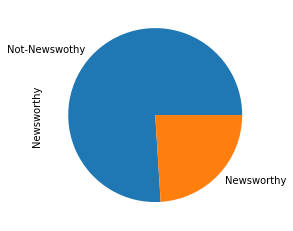

In [31]:
tweet_count=tweets_df['Newsworthy'].value_counts()
print(tweet_count)
tweet_count.plot(kind='pie')

#### Creating a new Dataframe to store the Newsworthy tweets alone

In [32]:
newsworthy_tweets_df = tweets_df[tweets_df['Newsworthy']=='Newsworthy']
newsworthy_tweets_df

,_id,date,username,text,geoenabled,coordinates,location,place_name,place_country,country_code,place_coordinates,hashtags,mentions,source,Tokens,Newsworthy
1,1486425474335076352,{'$date': '2022-01-26T19:47:04Z'},CelebFitnessTV,How to Make Sure Your COVID Test Isn't Fake ht...,True,"{'type': 'Point', 'coordinates': [-0.18016398,...",United Kingdom,"Kensington, London",United Kingdom,GB,"[[[-0.2285894, 51.4772246], [-0.1497908, 51.47...",[],[],dlvr.it,"[sure, covid, test, fake]",Newsworthy
3,1486427833899655169,{'$date': '2022-01-26T19:56:26Z'},komabs16,GY413\n#andresrodriguezpose @ The London Schoo...,True,"{'type': 'Point', 'coordinates': [-0.116778920...","London, England","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[andresrodriguezpose],[],Instagram,"[andresrodriguezpose, london, school, economic...",Newsworthy
16,1486436373456433153,{'$date': '2022-01-26T20:30:22Z'},EstasBooths,Magic mirror photo booth hire in Kent and Sout...,True,"{'type': 'Point', 'coordinates': [-0.109400000...",Kent,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[magicmirror, magicmirrorbooth]",[],Instagram,"[magic, mirror, photo, booth, hire, kent, sout...",Newsworthy
22,1486438809038254080,{'$date': '2022-01-26T20:40:03Z'},StigmabaseO,Big increase in recent PrEP users among new HI...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],dlvr.it,"[big, increase, recent, prep, users, new, hiv,...",Newsworthy
29,1486443822360014853,{'$date': '2022-01-26T20:59:58Z'},IanEa,"Hello, can I help you? #canela #cavapoo #dogli...",True,"{'type': 'Point', 'coordinates': [-0.109400000...",United Kingdom,"City of London, London",United Kingdom,GB,"[[[-0.112442, 51.5068], [-0.0733794, 51.5068],...","[canela, cavapoo, doglife]",[],Instagram,"[hello, help, canela, cavapoo, doglife, london...",Newsworthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4120,1488775079664107522,{'$date': '2022-02-02T07:23:33Z'},StigmabaseO,Phillip Schofield beams as he and wife Steph e...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],dlvr.it,"[phillip, schofield, beams, wife, steph, enjoy...",Newsworthy
4121,1488775085125038083,{'$date': '2022-02-02T07:23:35Z'},StigmabaseO,Scottish Alba councillor launches 'appalling' ...,True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],dlvr.it,"[scottish, alba, councillor, launches, appalli...",Newsworthy
4122,1488775090489597952,{'$date': '2022-02-02T07:23:36Z'},StigmabaseO,"Ben Whishaw says he's sometimes ""critical"" of ...",True,"{'type': 'Point', 'coordinates': [-0.13608912,...",Americas | United Kingdom,"London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...",[],[],dlvr.it,"[ben, whishaw, says, critical, straight, actor...",Newsworthy
4126,1488776710233333764,{'$date': '2022-02-02T07:30:02Z'},BritishHeraldUK,"#Trump’s Words, and Deeds, Reveal Depths of Hi...",True,"{'type': 'Point', 'coordinates': [-0.12485951,...","London, United Kingdom","London, England",United Kingdom,GB,"[[[-0.18789399999999998, 51.483718], [-0.10997...","[Trump, RetainPower]",[],dlvr.it,"[trump, words, deeds, reveal, depths, drive, r...",Newsworthy


#### Comparing the results of the new newsworthy tweet set to the previous tweet set(full)

#### Creating a new grid to allocate the tweets

In [33]:
newsworthy_grid=np.zeros((len(rows),len(cols)))
newsworthy_grid.shape

(48, 59)

#### Storing the coordinates of the newsworthy tweets for easy access

In [34]:
x_newsworthy_tweets=[]
y_newsworthy_tweets=[]

for tweet in newsworthy_tweets_df['coordinates']:
    x_newsworthy_tweets.append(tweet['coordinates'][1])
    y_newsworthy_tweets.append(tweet['coordinates'][0])


#### Allocating the newsworthy tweets to the grid created

In [35]:
#the grid contains the count of the tweets 
for i in range(len(newsworthy_tweets_df['coordinates'])):
    row_val = int(np.ceil(distance_points(bottomLeft,[bottomLeft[0],x_newsworthy_tweets[i]])))
    col_val = int(np.ceil(distance_points(bottomLeft,[y_newsworthy_tweets[i],bottomLeft[1]])))
    newsworthy_grid[row_val,col_val]+=1

In [36]:
#Maximum number of tweet inside a grid
print('Maximum number of tweets at a grid: ',np.amax(newsworthy_grid))
print('Index of grid with maximum number of tweets: ',np.where(newsworthy_grid==np.amax(newsworthy_grid)))

Maximum number of tweets at a grid:  269.0
Index of grid with maximum number of tweets:  (array([28], dtype=int64), array([30], dtype=int64))


#### Creating a heat map to show the distribution of Newsworthy tweets inside grid

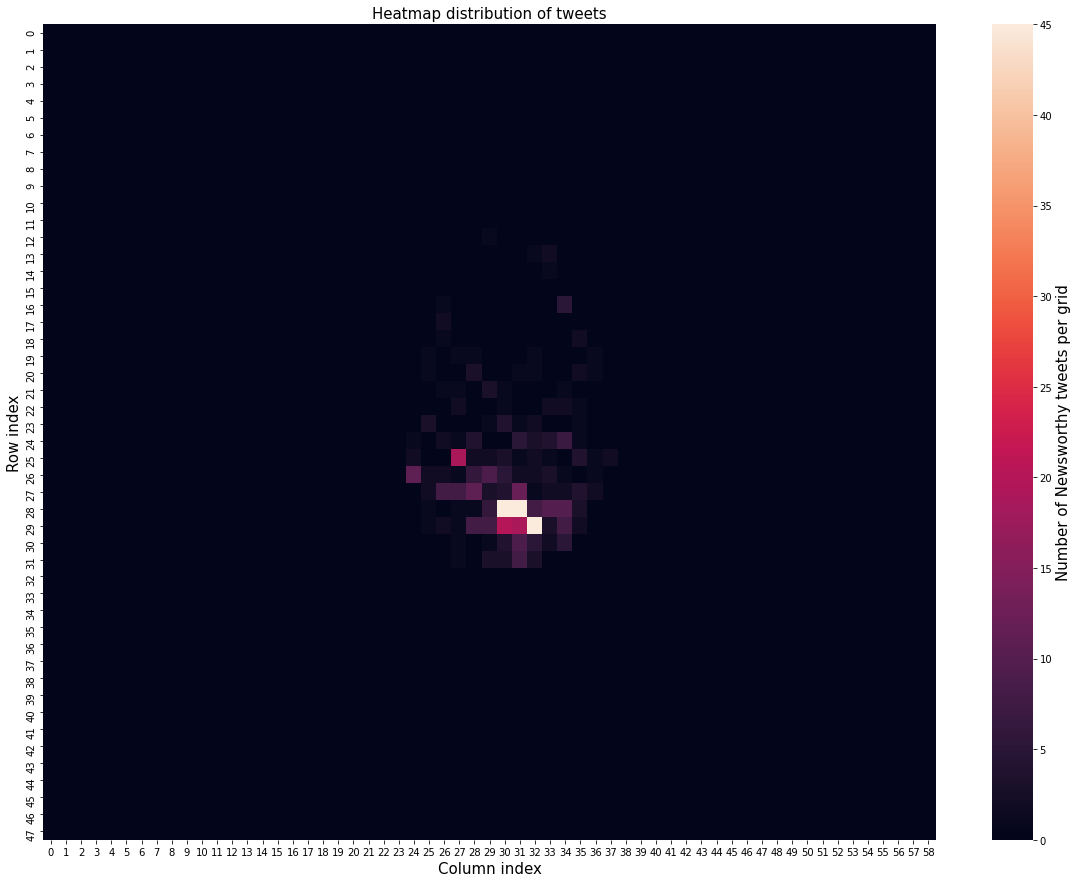

In [37]:
plt.figure(figsize = (20,15))
cbar_kws={'label': 'Number of Newsworthy tweets per grid'}
newsworthy_tweet_heatmap = sns.heatmap(newsworthy_grid,vmin=0,vmax=45,cbar_kws=cbar_kws,xticklabels=np.arange(len(cols)),yticklabels=np.arange(len(rows)))
newsworthy_tweet_heatmap.set_xlabel('Column index', fontsize=15)
newsworthy_tweet_heatmap.set_ylabel('Row index', fontsize=15)
newsworthy_tweet_heatmap.set_title('Heatmap distribution of tweets',fontsize=15)
newsworthy_tweet_heatmap.figure.axes[-1].yaxis.label.set_size(15)

#### Interpretation of number of newsworthy tweets vs number of grids

In [38]:
#Similar to the previous tweet set - creating a dictionary to hold the number of tweets vs number of grid counts
num_tweets, grid_counts = np.unique(newsworthy_grid, return_counts=True)
newsworthy_tweet_count_dict=dict(zip(num_tweets, grid_counts))
newsworthy_tweet_count_dict

{0.0: 2719,
 1.0: 41,
 2.0: 25,
 3.0: 12,
 4.0: 7,
 5.0: 5,
 6.0: 2,
 7.0: 1,
 8.0: 7,
 9.0: 2,
 10.0: 2,
 11.0: 2,
 12.0: 1,
 19.0: 2,
 20.0: 1,
 99.0: 1,
 241.0: 1,
 269.0: 1}

#### Plotting the above findings in bar graph format

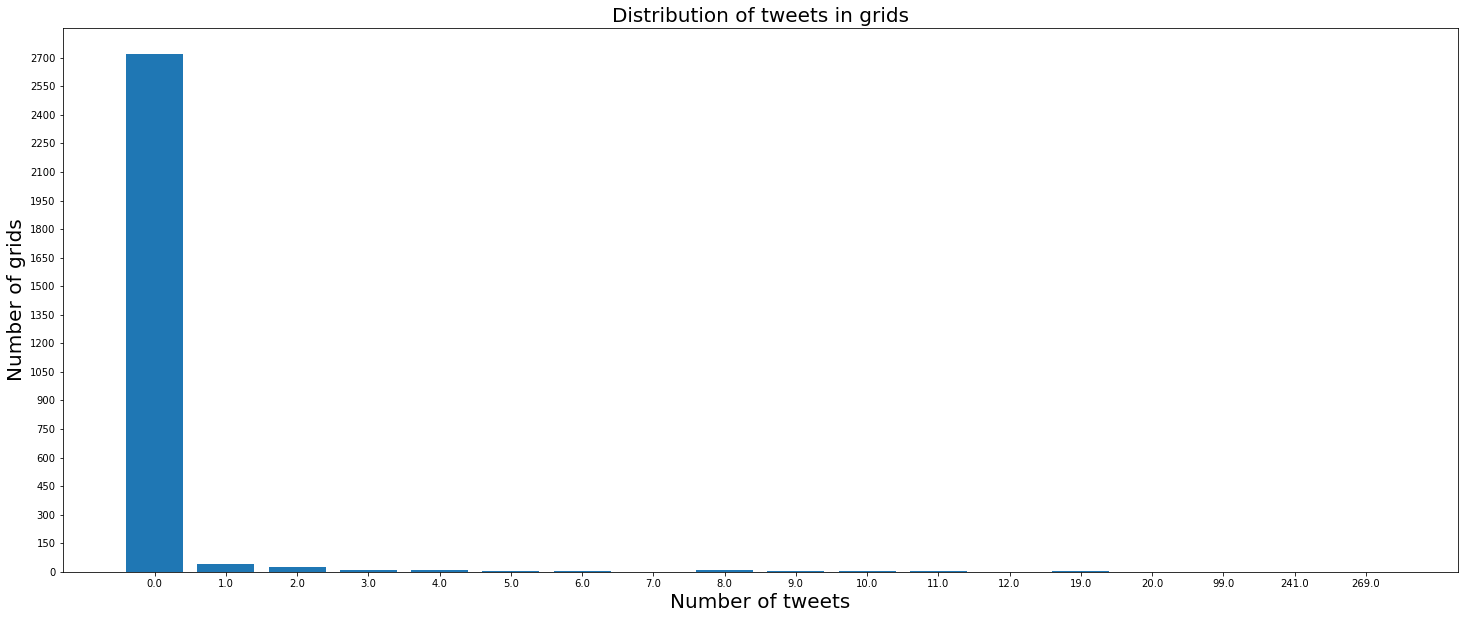

In [39]:
x_axis = newsworthy_tweet_count_dict.keys()
y_axis = newsworthy_tweet_count_dict.values()
plt.figure(figsize = (25,10))
plt.bar(range(len(newsworthy_tweet_count_dict)),y_axis)
plt.xticks(range(len(newsworthy_tweet_count_dict)), list(x_axis))
plt.yticks(np.arange(0,max(y_axis),150))
plt.title('Distribution of tweets in grids',fontsize=20)
plt.xlabel("Number of tweets",fontsize=20)
plt.ylabel("Number of grids",fontsize=20)
plt.show()

#### Comparision of number of tweets vs number of grids graph with full tweet set and newsworthy tweets 

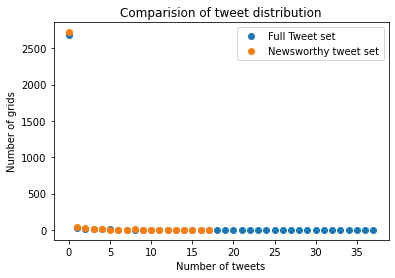

In [40]:
plt.plot(range(len(tweet_count_dict)),tweet_count_dict.values(),'o')
plt.plot(range(len(newsworthy_tweet_count_dict)),newsworthy_tweet_count_dict.values(),'o')
plt.legend(["Full Tweet set", "Newsworthy tweet set"], loc ="upper right")
plt.xlabel('Number of tweets')
plt.ylabel('Number of grids')
plt.title('Comparision of tweet distribution')
plt.show()